In [1]:
# %config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from loguru import logger

import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')

import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

%load_ext autoreload
%autoreload 1
%aimport sctk

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/umap/distances.py:1086: 

In [5]:
import anndata as ad

In [6]:
raw_counts_matrix="/home/mowp/test/infercnv/inst/extdata/oligodendroglioma_expression_downsampled.counts.matrix.gz"
raw_counts_matrix = pd.read_csv(raw_counts_matrix, sep='\t')

In [7]:
adata = ad.AnnData(raw_counts_matrix.T)
adata.obs_names = raw_counts_matrix.columns
adata.var_names = raw_counts_matrix.index

In [8]:
annotations_file="/home/mowp/test/infercnv/inst/extdata/oligodendroglioma_annotations_downsampled.txt"
annotations_file = pd.read_csv(annotations_file, sep='\t', header=None, names=['cell', 'cell_type'], index_col=0)

In [9]:
adata.obs['cell_type'] = annotations_file.loc[adata.obs_names, 'cell_type']

In [10]:
adata.layers['counts'] = adata.X.copy()

In [11]:
adata

AnnData object with n_obs × n_vars = 184 × 10338
    obs: 'cell_type'
    layers: 'counts'

# inferCNV

In [13]:
sctk.tl.run_inferCNV_r(
    adata,
    gene_order_file="/home/mowp/test/infercnv/inst/extdata/gencode_downsampled.EXAMPLE_ONLY_DONT_REUSE.txt",
    ref_group_names=("Microglia/Macrophage","Oligodendrocytes (non-malignant)"),
    layer='counts',
    cell_type ='cell_type',
    out_dir = '/home/mowp/test/infercnv_out',
    num_threads=16,
)

2023-12-05 10:26:36.810 | INFO     | sctk.tools.inferCNV:run_inferCNV_r:60 - output directory: /home/mowp/test/infercnv_out
2023-12-05 10:26:38.762 | INFO     | sctk.tools.inferCNV:run_inferCNV_r:84 - Running inferCNV CreateInfercnvObject...


INFO [2023-12-05 10:26:38] Parsing gene order file: /home/mowp/test/infercnv/inst/extdata/gencode_downsampled.EXAMPLE_ONLY_DONT_REUSE.txt
INFO [2023-12-05 10:26:38] ::order_reduce:Start.
INFO [2023-12-05 10:26:38] .order_reduce(): expr and order match.
INFO [2023-12-05 10:26:38] ::process_data:order_reduce:Reduction from positional data, new dimensions (r,c) = 10338,184 Total=18322440.6799817 Min=0 Max=34215.
INFO [2023-12-05 10:26:38] num genes removed taking into account provided gene ordering list: 399 = 3.8595473012188% removed.
INFO [2023-12-05 10:26:38] -filtering out cells < 100 or > Inf, removing 0 % of cells
WARN [2023-12-05 10:26:38] Please use "options(scipen = 100)" before running infercnv if you are using the analysis_mode="subclusters" option or you may encounter an error while the hclust is being generated.
INFO [2023-12-05 10:26:38] validating infercnv_obj


2023-12-05 10:26:38.973 | INFO     | sctk.tools.inferCNV:run_inferCNV_r:96 - Running inferCNV run...


INFO [2023-12-05 10:26:38] ::process_data:Start
INFO [2023-12-05 10:26:38] Checking for saved results.
INFO [2023-12-05 10:26:38] 

	STEP 1: incoming data

INFO [2023-12-05 10:26:39] 

	STEP 02: Removing lowly expressed genes

INFO [2023-12-05 10:26:39] ::above_min_mean_expr_cutoff:Start
INFO [2023-12-05 10:26:39] Removing 692 genes from matrix as below mean expr threshold: 0.1
INFO [2023-12-05 10:26:39] validating infercnv_obj
INFO [2023-12-05 10:26:39] There are 9247 genes and 184 cells remaining in the expr matrix.
INFO [2023-12-05 10:26:39] Removed 30 genes having fewer than 3 min cells per gene = 0.32443 % genes removed here
INFO [2023-12-05 10:26:40] validating infercnv_obj
INFO [2023-12-05 10:26:41] 

	STEP 03: normalization by sequencing depth

INFO [2023-12-05 10:26:41] normalizing counts matrix by depth
INFO [2023-12-05 10:26:41] Computed total sum normalization factor as median libsize: 94317.864315
INFO [2023-12-05 10:26:42] 

	STEP 04: log transformation of data

INFO [202

R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]

INFO [2023-12-05 10:27:10] define_signif_tumor_subclusters(), tumor: malignant_97


R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]

INFO [2023-12-05 10:27:10] define_signif_tumor_subclusters(), tumor: malignant_MGH36


R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]

INFO [2023-12-05 10:27:11] define_signif_tumor_subclusters(), tumor: malignant_MGH53


R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]

INFO [2023-12-05 10:27:11] define_signif_tumor_subclusters(), tumor: Microglia/Macrophage
INFO [2023-12-05 10:27:11] Less cells in group Microglia/Macrophage than k_nn setting. Keeping as a single subcluster.
INFO [2023-12-05 10:27:11] define_signif_tumor_subclusters(), tumor: Oligodendrocytes (non-malignant)


R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]

INFO [2023-12-05 10:27:22] 

	STEP 22: Denoising

INFO [2023-12-05 10:27:22] ::process_data:Remove noise, noise threshold defined via ref mean sd_amplifier:  1.5
INFO [2023-12-05 10:27:22] denoising using mean(normal) +- sd_amplifier * sd(normal) per gene per cell across all data
INFO [2023-12-05 10:27:22] :: **** clear_noise_via_ref_quantiles **** : removing noise between bounds:  0.890075082513755 - 1.11741373694138
INFO [2023-12-05 10:27:24] 

## Making the final infercnv heatmap ##
INFO [2023-12-05 10:27:25] ::plot_cnv:Start
INFO [2023-12-05 10:27:25] ::plot_cnv:Current data dimensions (r,c)=9217,184 Total=1700488.69128122 Min=0.54136164285976 Max=1.87291528293745.
INFO [2023-12-05 10:27:25] ::plot_cnv:Depending on the size of the matrix this may take a moment.
INFO [2023-12-05 10:27:26] plot_cnv(): auto thresholding at: (0.660167 , 1.339833)
INFO [2023-12-05 10:27:26] plot_cnv_observation:Start
INFO [2023-12-05 10:27:26] Observation data size: Cells= 142 Genes= 9217
INFO [2023-12-

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Requested number is larger than the number of available items (40). Setting to 40. 

R[write to console]: 2: Requested number is larger than the number of available items (40). Setting to 40. 

R[write to console]: 3: Requested number is larger than the number of available items (40). Setting to 40. 

R[write to console]: 4: Requested number is larger than the number of available items (40). Setting to 40. 

R[write to console]: 5: Requested number is larger than the number of available items (40). Setting to 40. 



# infercnvpy

In [12]:
import infercnvpy as cnv

In [19]:
gene_order_file="/home/mowp/test/infercnv/inst/extdata/gencode_downsampled.EXAMPLE_ONLY_DONT_REUSE.txt"
gene_order_file = pd.read_csv(gene_order_file, sep='\t', header=None, names=['gene_id', 'chromosome', 'start', 'end'], index_col=0)

In [26]:
adata.var[['chromosome', 'start', 'end']] = gene_order_file.loc[adata.var_names, :]

In [28]:
adata

AnnData object with n_obs × n_vars = 184 × 10338
    obs: 'cell_type'
    var: 'chromosome', 'start', 'end'
    layers: 'counts'

In [29]:
cnv.tl.infercnv(
    adata,
    reference_key="cell_type",
    reference_cat=["Microglia/Macrophage","Oligodendrocytes (non-malignant)"],
    window_size=250,
)

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


  0%|          | 0/1 [00:00<?, ?it/s]

... storing 'cell_type' as categorical


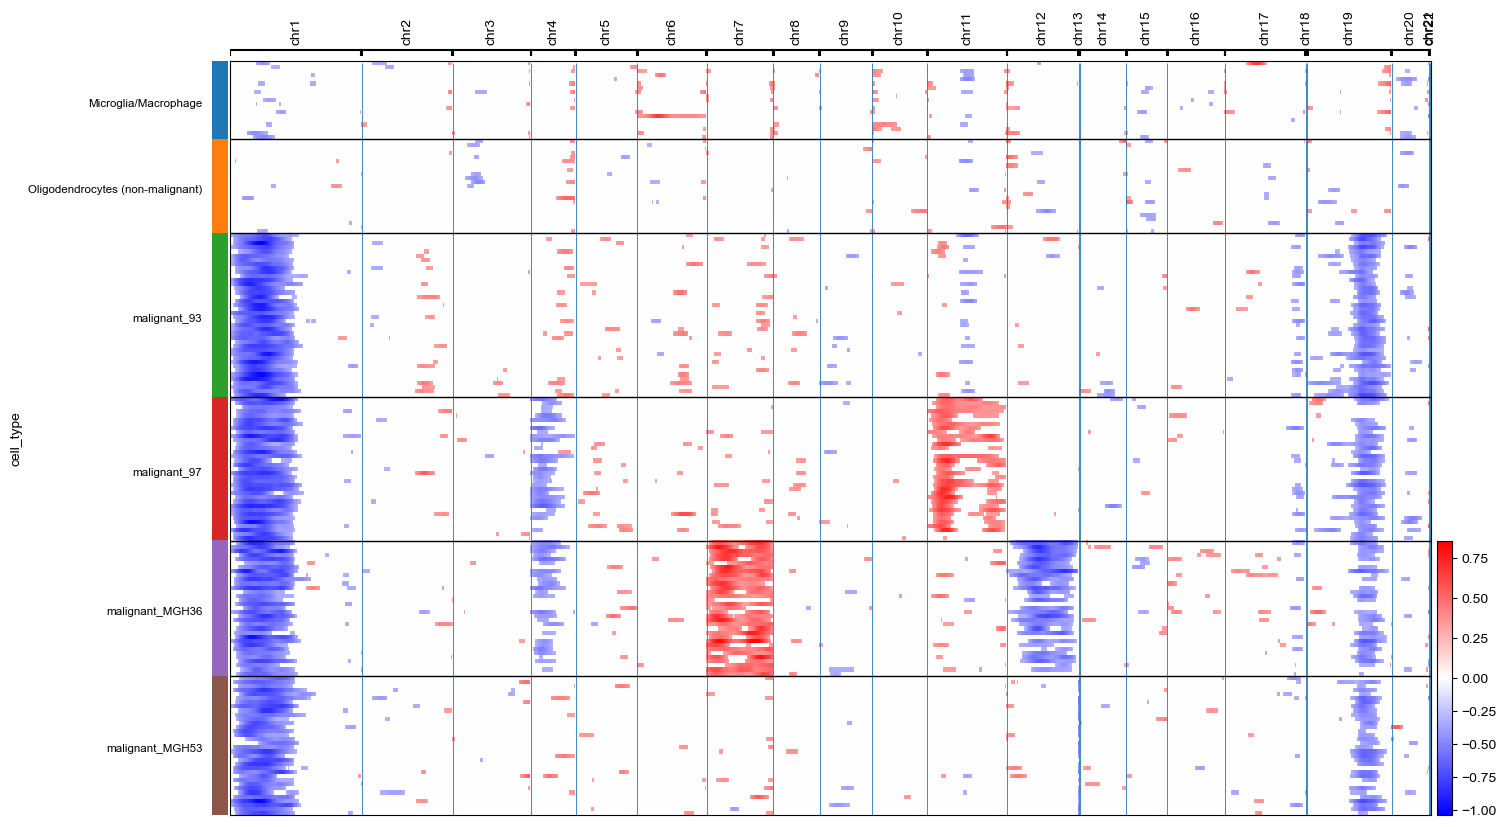

In [30]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type")

In [31]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

... storing 'cell_type' as categorical


         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


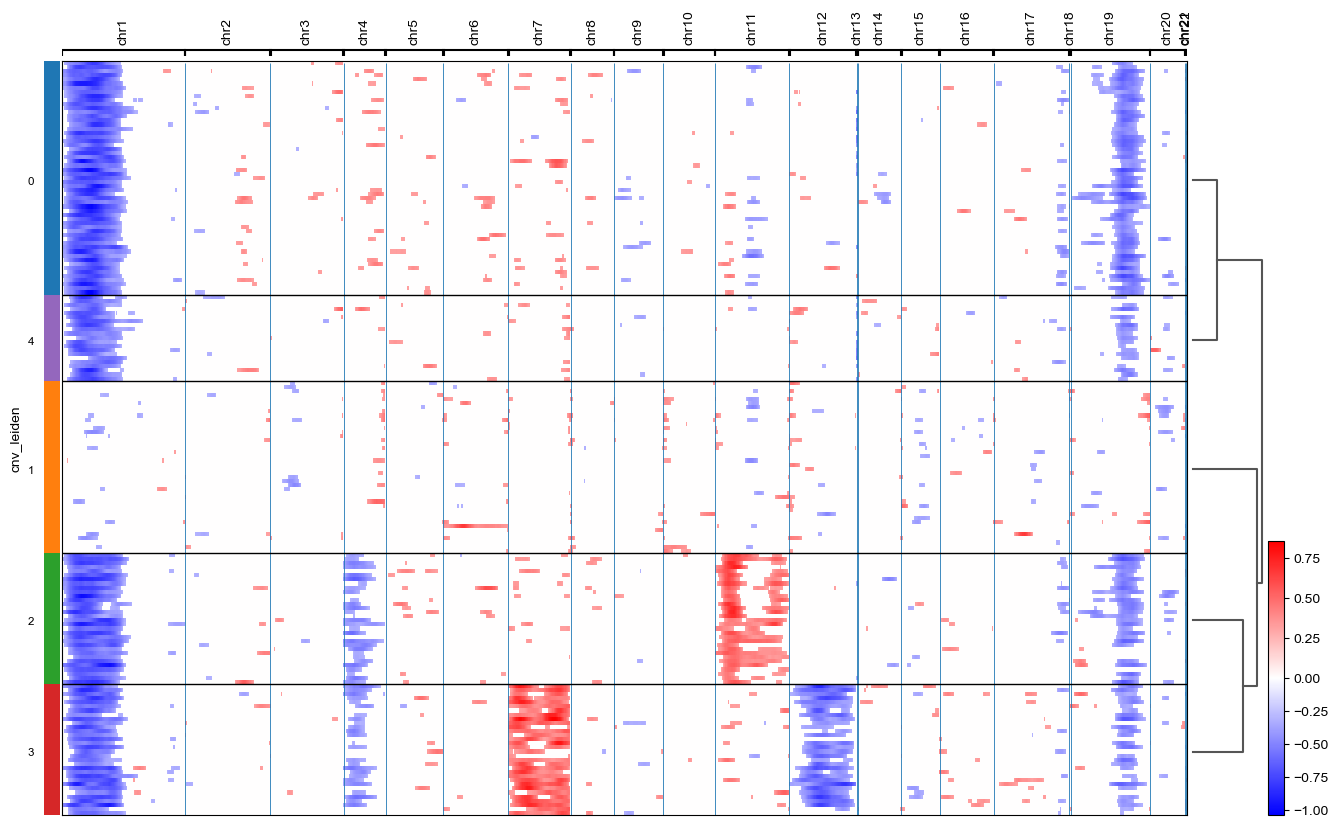

In [32]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

In [33]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata)

... storing 'cell_type' as categorical
... storing 'chromosome' as categorical
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avo

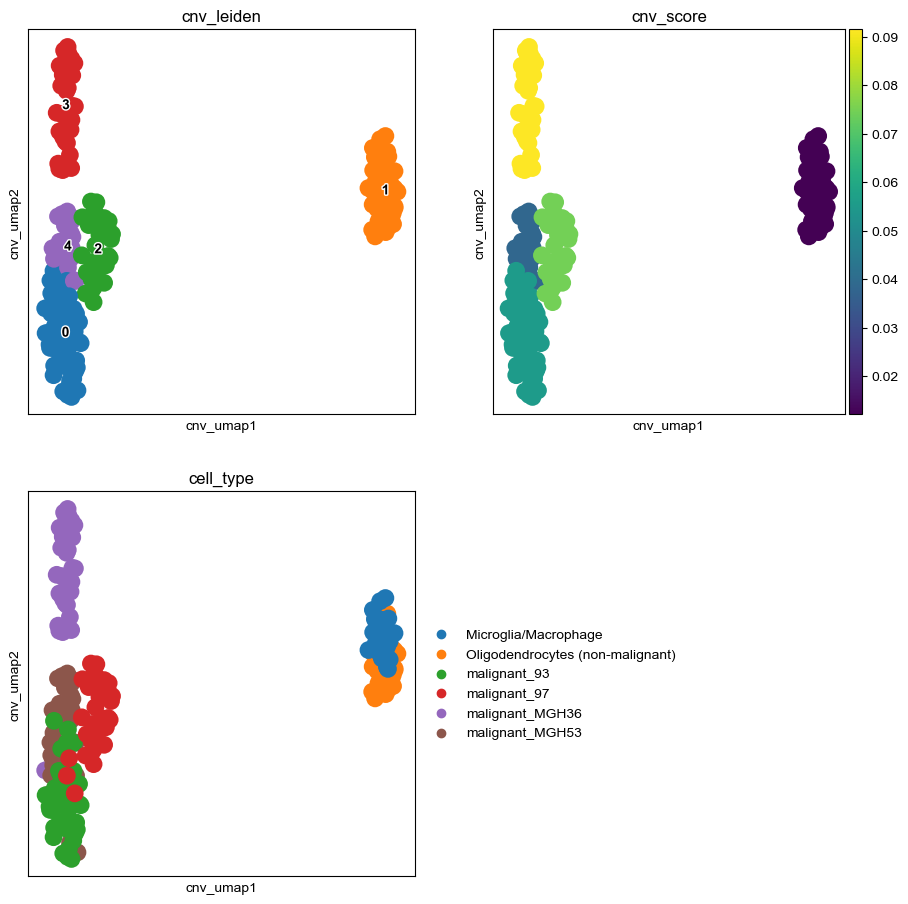

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 11))
ax4.axis("off")
cnv.pl.umap(
    adata,
    color="cnv_leiden",
    legend_loc="on data",
    legend_fontoutline=2,
    ax=ax1,
    show=False,
)
cnv.pl.umap(adata, color="cnv_score", ax=ax2, show=False)
cnv.pl.umap(adata, color="cell_type", ax=ax3)

In [36]:
adata

AnnData object with n_obs × n_vars = 184 × 10338
    obs: 'cell_type', 'cnv_leiden', 'cnv_score'
    var: 'chromosome', 'start', 'end'
    uns: 'cnv', 'cell_type_colors', 'cnv_neighbors', 'leiden', 'cnv_leiden_colors', 'dendrogram_cnv_leiden'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap'
    layers: 'counts'
    obsp: 'cnv_neighbors_distances', 'cnv_neighbors_connectivities'

In [37]:
adata.obs

,cell_type,cnv_leiden,cnv_score
MGH54_P16_F12,Oligodendrocytes (non-malignant),1,0.012086
MGH54_P12_C10,Oligodendrocytes (non-malignant),1,0.012086
MGH54_P11_C11,Oligodendrocytes (non-malignant),1,0.012086
MGH54_P15_D06,Oligodendrocytes (non-malignant),1,0.012086
MGH54_P16_A03,Oligodendrocytes (non-malignant),1,0.012086
...,...,...,...
97_P6_D09,malignant_97,2,0.074618
97_P6_B09,malignant_97,2,0.074618
97_P5_D01,malignant_97,0,0.055420
97_P6_G12,malignant_97,0,0.055420
